In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('college_student_management_data.csv')
df.head()

,student_id,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,risk_level
0,S001,24,Other,Computer Science,2.42,5,67.2,0.71,Graduated,32,33,0.70,8,0.74,High
1,S002,21,Male,Arts,3.73,6,64.4,0.84,Leave,29,53,0.91,13,0.85,Medium
2,S003,22,Male,Computer Science,2.80,3,95.3,0.89,Graduated,34,69,0.58,18,0.99,Medium
3,S004,24,Male,Arts,2.59,4,73.7,0.98,Graduated,22,18,0.91,6,0.72,Medium
4,S005,20,Other,Computer Science,2.30,4,87.4,0.95,Active,9,11,0.77,15,0.76,High


In [6]:
# Show rows and columns
df.shape

(1545, 15)

In [7]:
# Show all columns
df.columns

Index(['student_id', 'age', 'gender', 'major', 'GPA', 'course_load',
       'avg_course_grade', 'attendance_rate', 'enrollment_status',
       'lms_logins_past_month', 'avg_session_duration_minutes',
       'assignment_submission_rate', 'forum_participation_count',
       'video_completion_rate', 'risk_level'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    1545 non-null   object 
 1   age                           1545 non-null   int64  
 2   gender                        1545 non-null   object 
 3   major                         1545 non-null   object 
 4   GPA                           1545 non-null   float64
 5   course_load                   1545 non-null   int64  
 6   avg_course_grade              1545 non-null   float64
 7   attendance_rate               1545 non-null   float64
 8   enrollment_status             1545 non-null   object 
 9   lms_logins_past_month         1545 non-null   int64  
 10  avg_session_duration_minutes  1545 non-null   int64  
 11  assignment_submission_rate    1545 non-null   float64
 12  forum_participation_count     1545 non-null   int64  
 13  vid

In [9]:
df.describe()

,age,GPA,course_load,avg_course_grade,attendance_rate,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,21.482848,3.012324,4.487379,79.914887,0.794460,19.344984,49.365049,0.752201,9.642718,0.750958
std,2.300287,0.571395,1.098163,11.528625,0.115142,11.515003,23.195192,0.144351,5.752493,0.144840
min,18.000000,2.000000,3.000000,60.000000,0.600000,0.000000,10.000000,0.500000,0.000000,0.500000
25%,19.000000,2.520000,4.000000,69.900000,0.690000,10.000000,29.000000,0.630000,5.000000,0.620000
50%,22.000000,3.030000,5.000000,79.600000,0.790000,19.000000,49.000000,0.760000,10.000000,0.750000
75%,23.000000,3.510000,5.000000,89.700000,0.890000,29.000000,70.000000,0.880000,15.000000,0.880000
max,25.000000,4.000000,6.000000,100.000000,1.000000,39.000000,89.000000,1.000000,19.000000,1.000000


In [10]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
major,0
GPA,0
course_load,0
avg_course_grade,0
attendance_rate,0
enrollment_status,0
lms_logins_past_month,0


In [11]:

for col in df.columns:
  if df[col].dtype =='object':
    df[col].fillna(df[col].mode()[0],inplace=True)
  else:
    df[col].fillna(df[col].mean(),inplace=True)

In [12]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
major,0
GPA,0
course_load,0
avg_course_grade,0
attendance_rate,0
enrollment_status,0
lms_logins_past_month,0


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

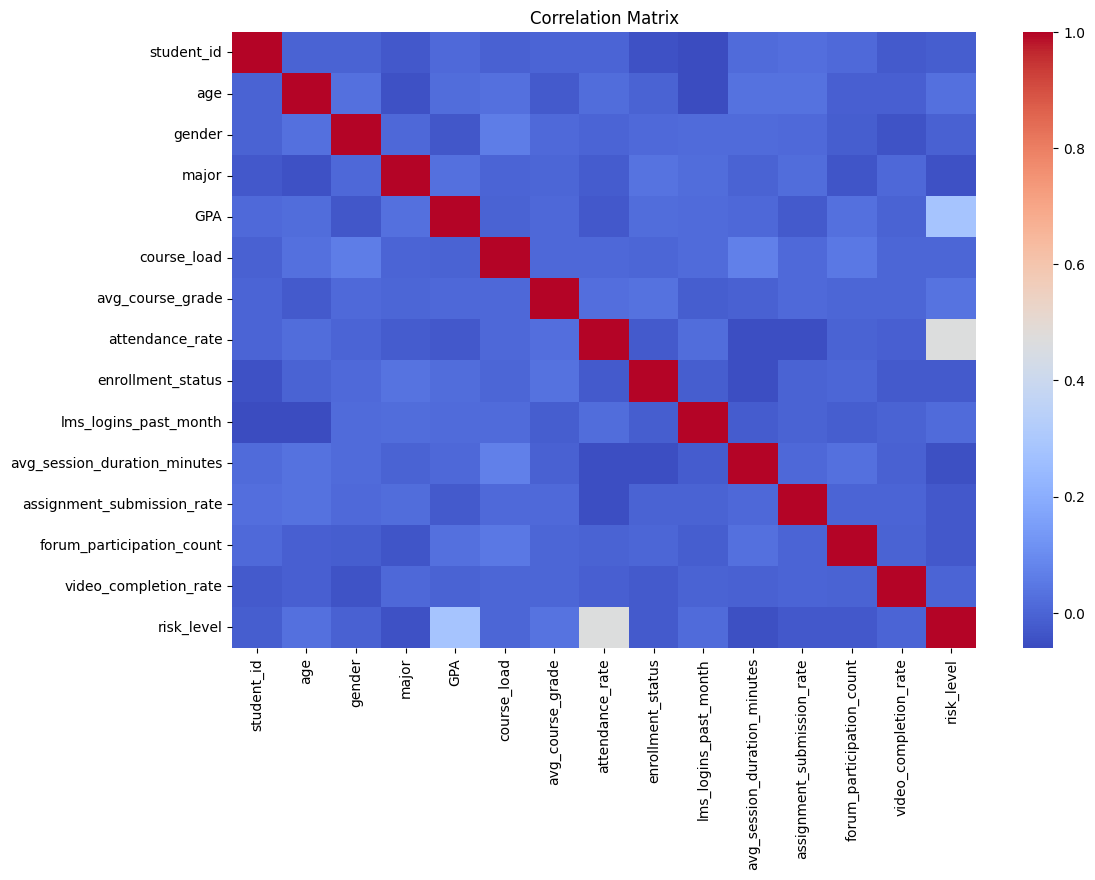

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
target_col = df.columns[-1]
target_col

'risk_level'

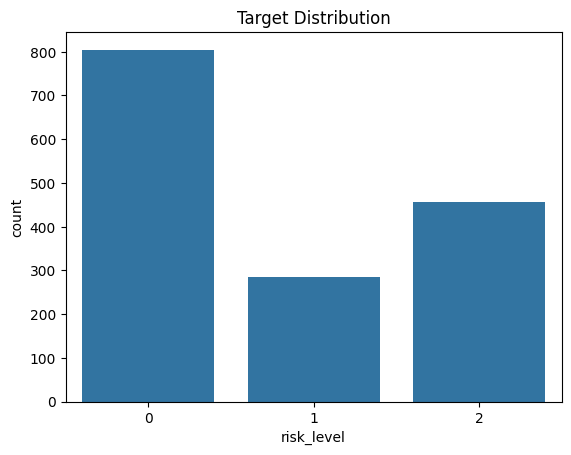

In [18]:
sns.countplot(x=df[target_col])
plt.title('Target Distribution')
plt.show()

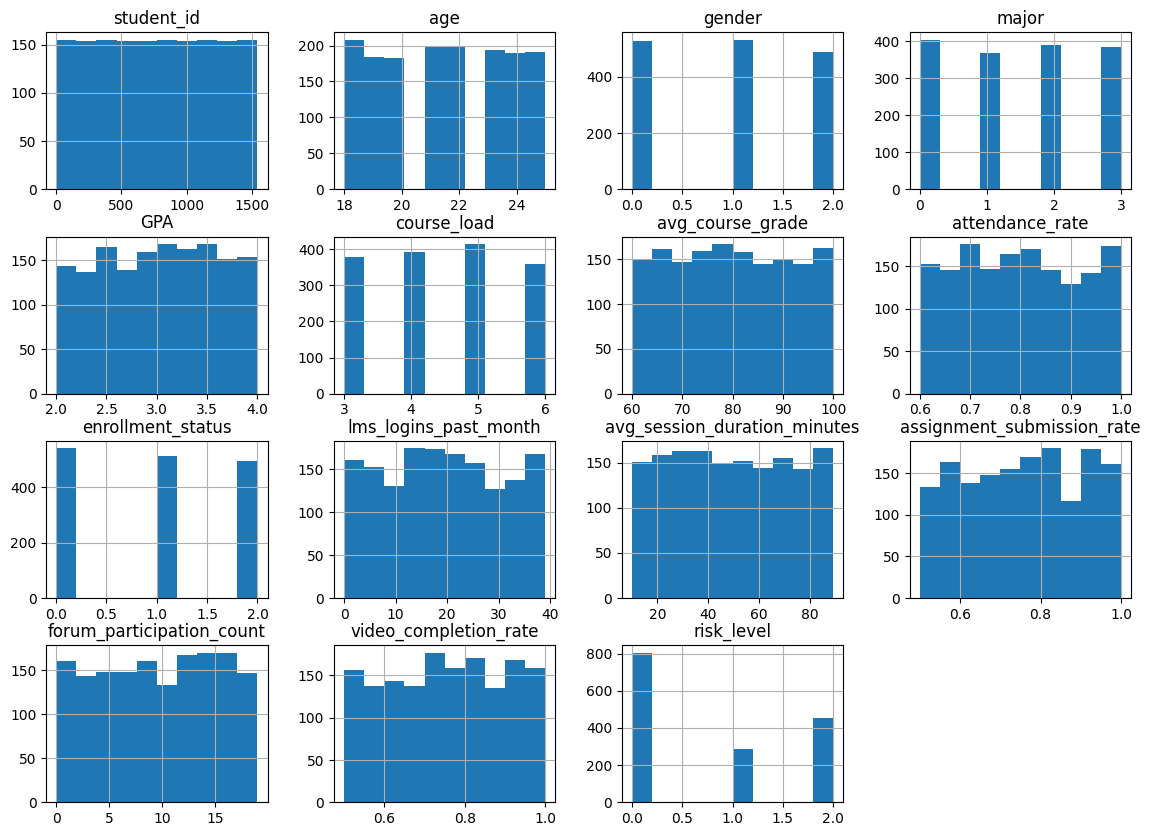

In [19]:
df.hist (figsize=(14,10))
plt.show()

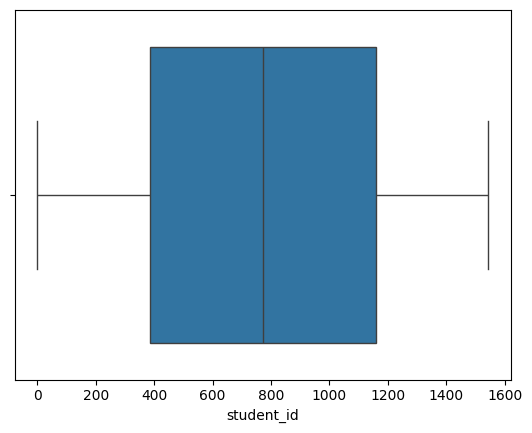

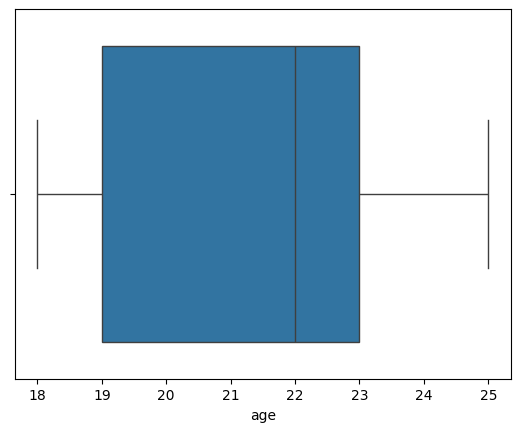

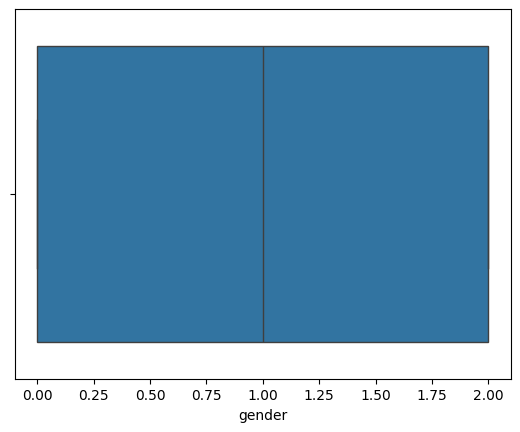

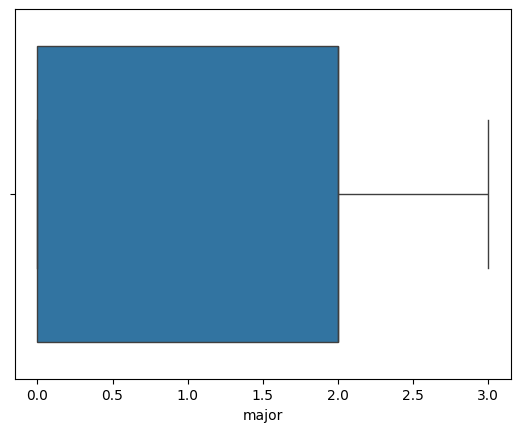

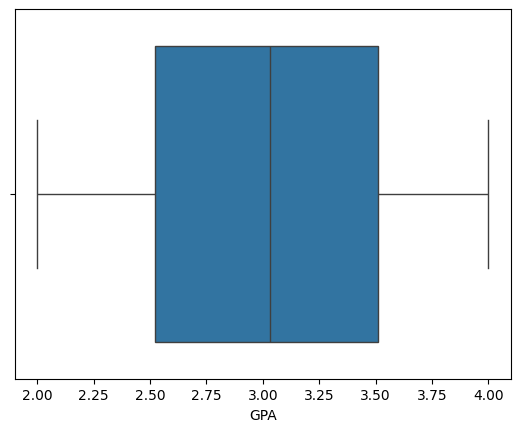

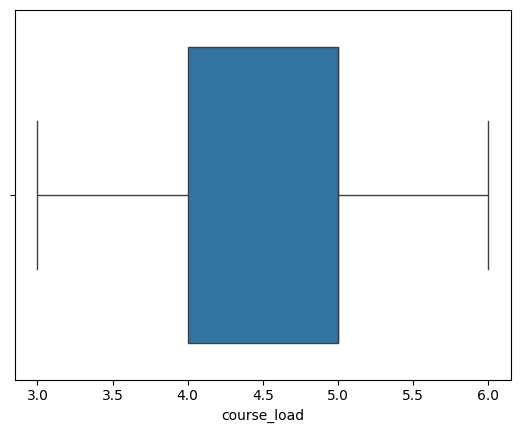

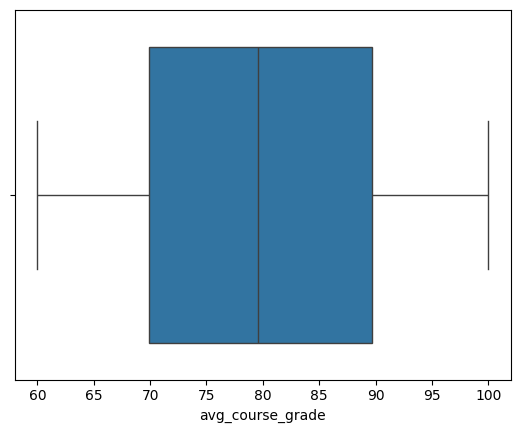

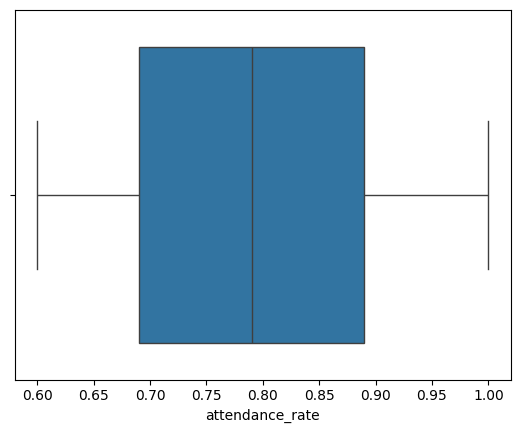

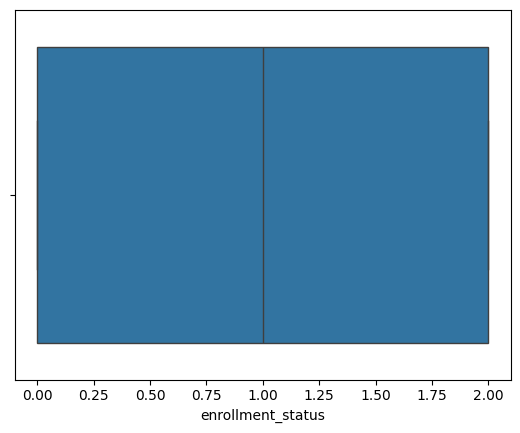

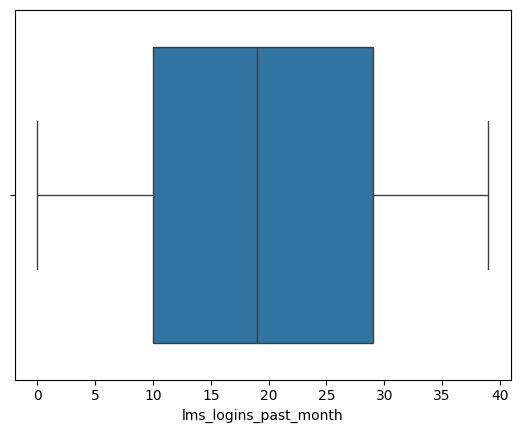

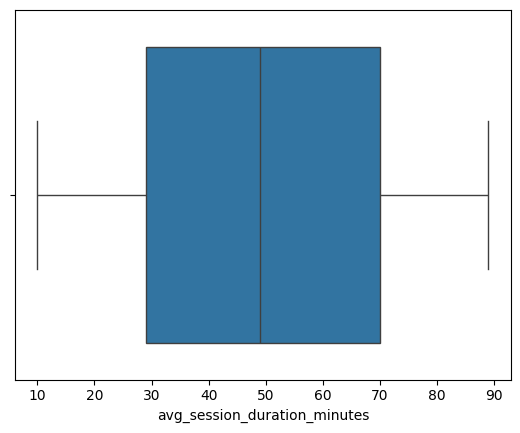

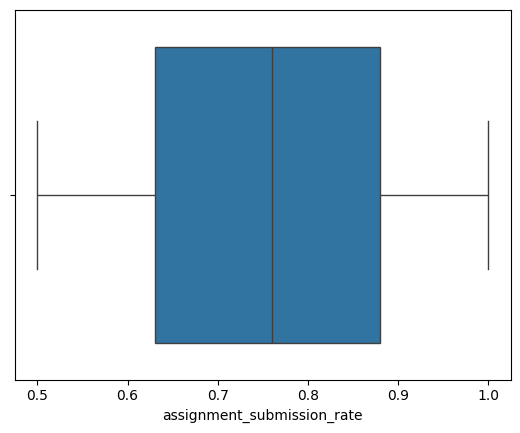

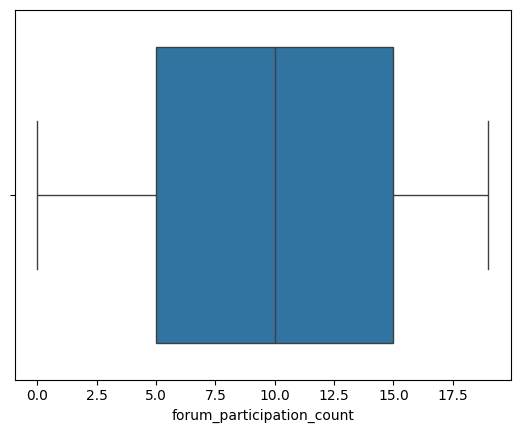

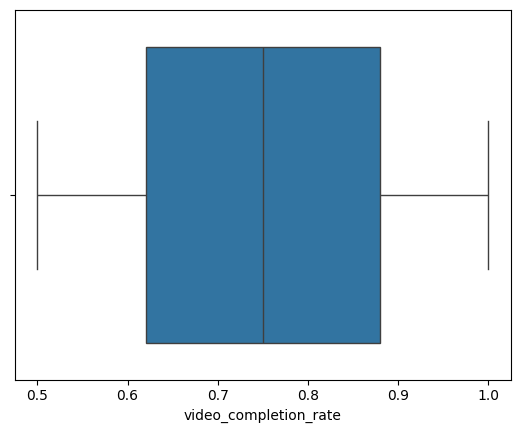

In [20]:
for col in df.columns[:-1]:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title

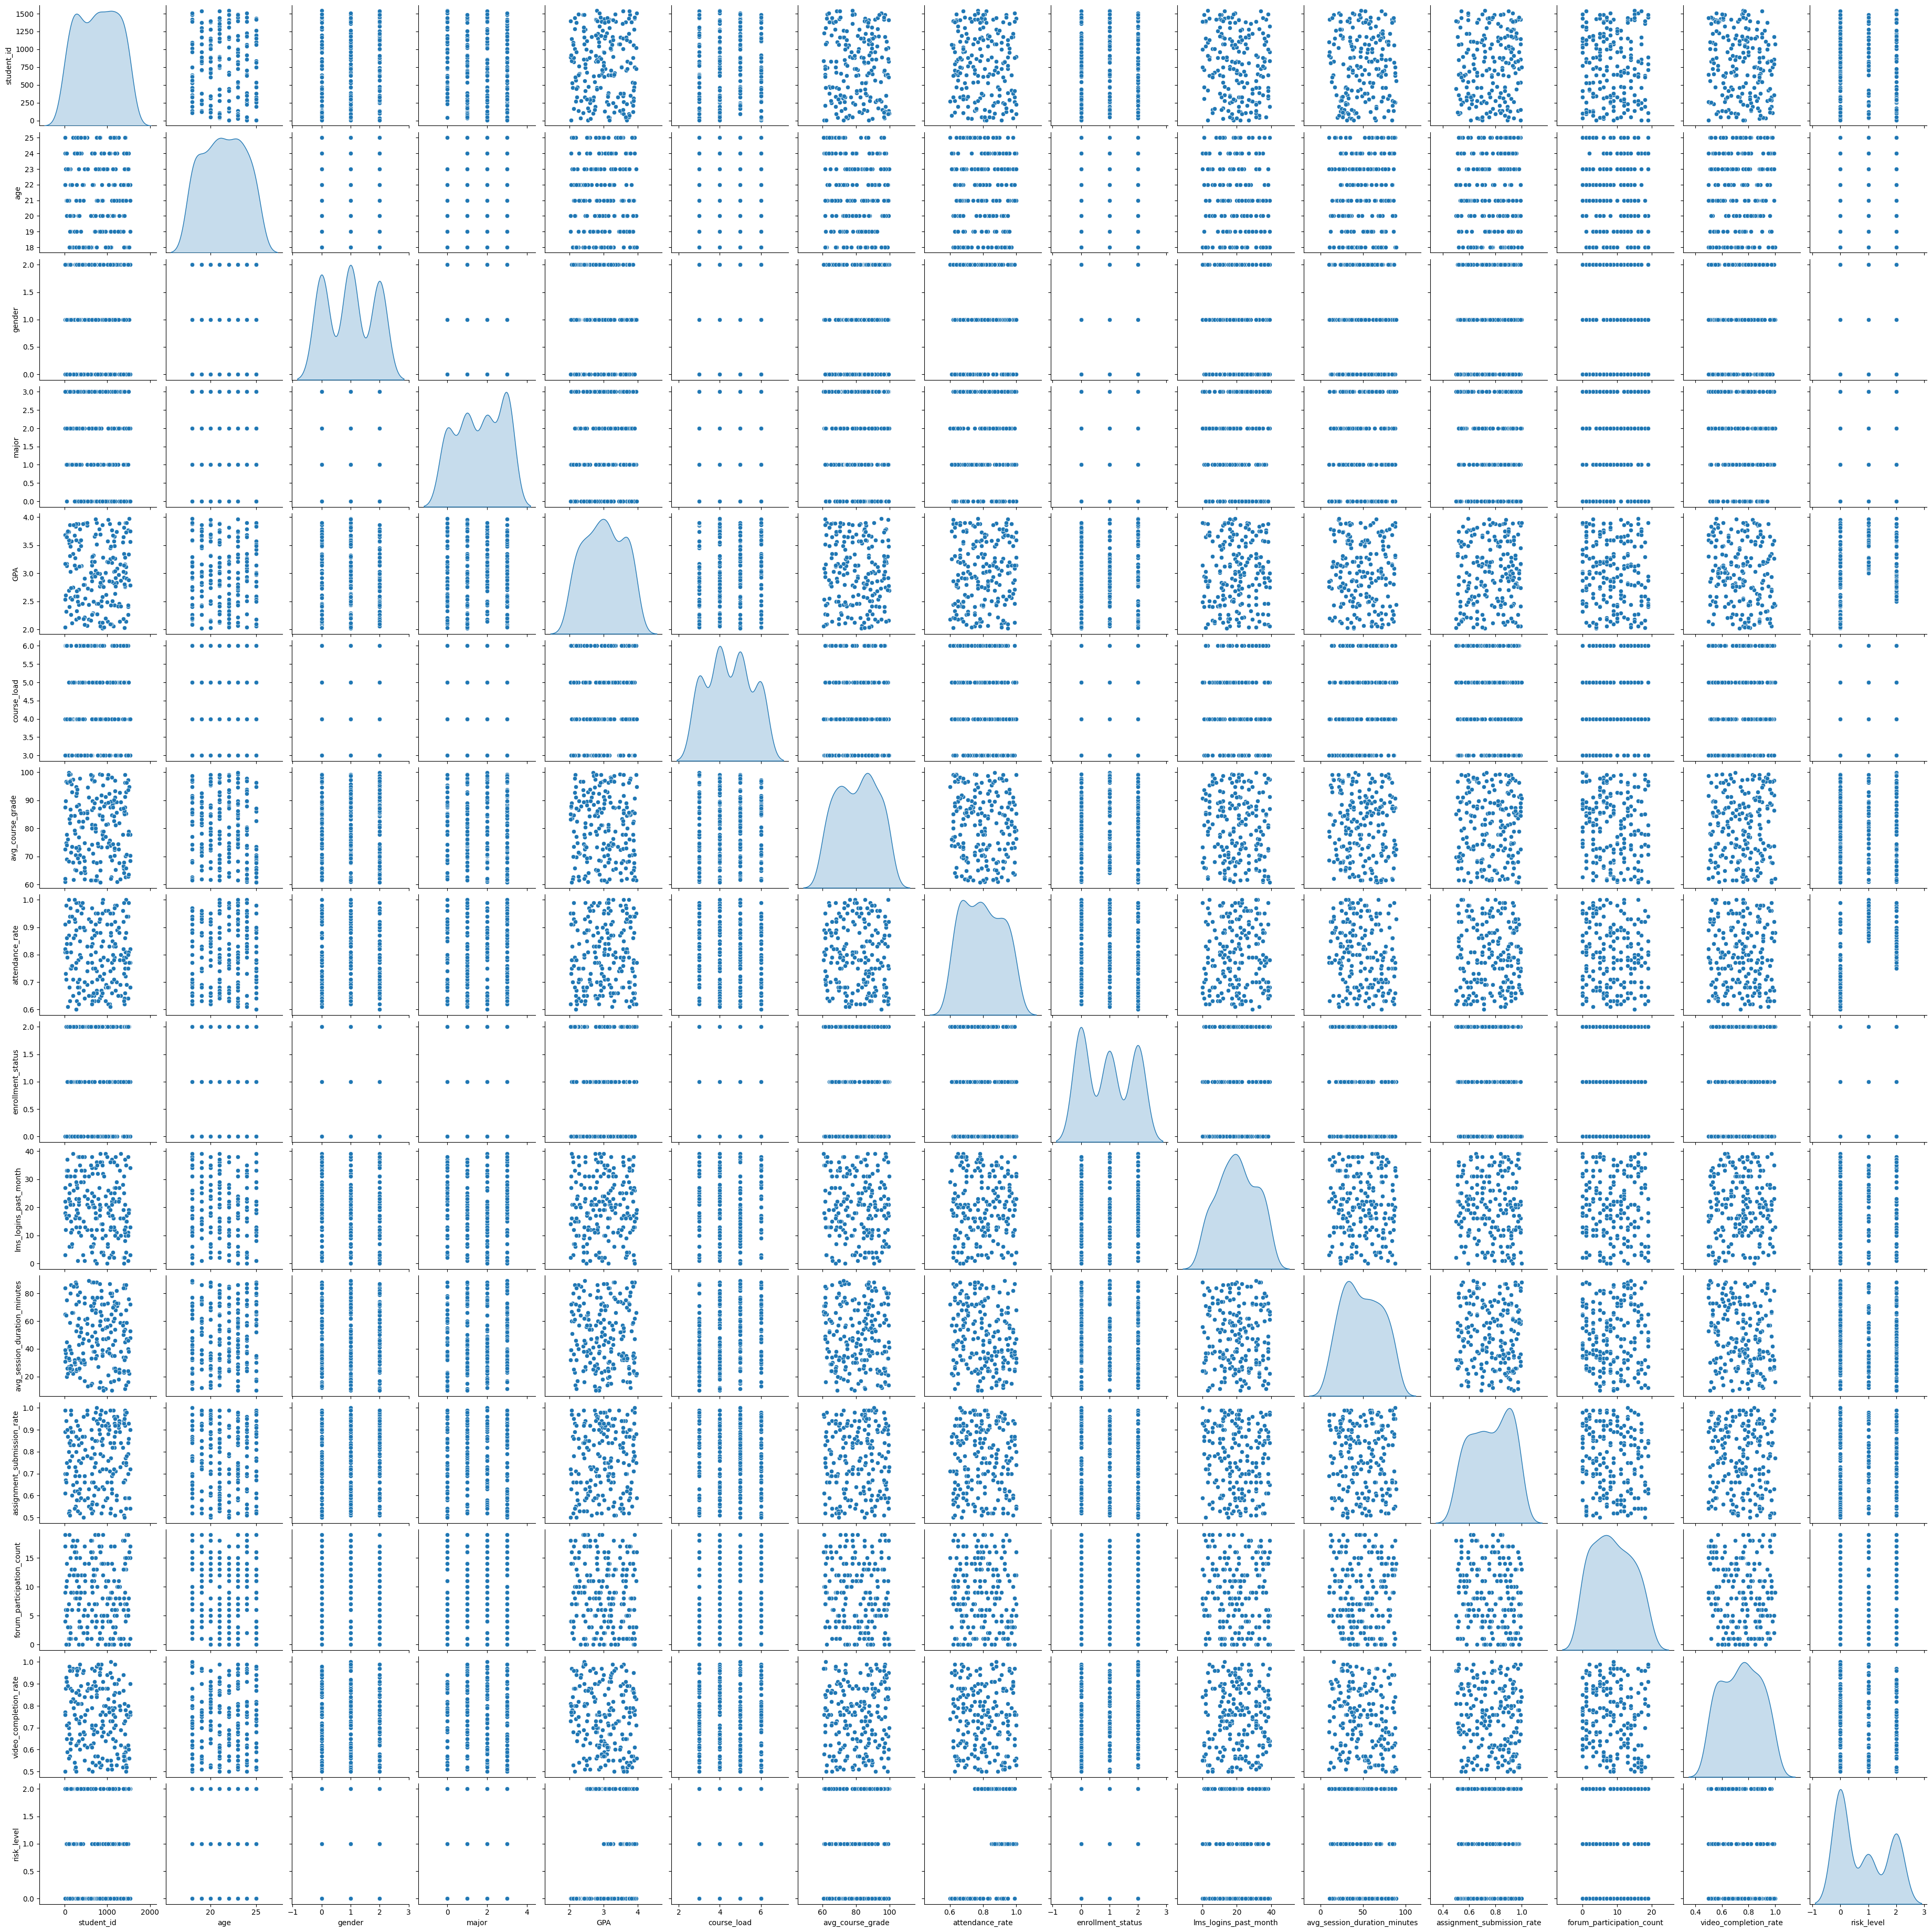

In [21]:
sns.pairplot(df.sample(min(200, len(df))), diag_kind='kde')
plt.show()


In [22]:
X = df.drop(target_col, axis=1)
y = df[target_col]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(
 X,y,test_size=0.2,random_state=42, stratify=y
 )


In [24]:
scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [25]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
accuracy_score(y_test,lr_pred)

0.7734627831715211

In [26]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
accuracy_score(y_test,dt_pred)

1.0

In [27]:
rf=RandomForestClassifier(n_estimators=300,random_state=42)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test,rf_pred)

0.9967637540453075

In [28]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       161
           1       0.79      0.72      0.75        57
           2       0.60      0.70      0.65        91

    accuracy                           0.77       309
   macro avg       0.76      0.75      0.75       309
weighted avg       0.79      0.77      0.78       309



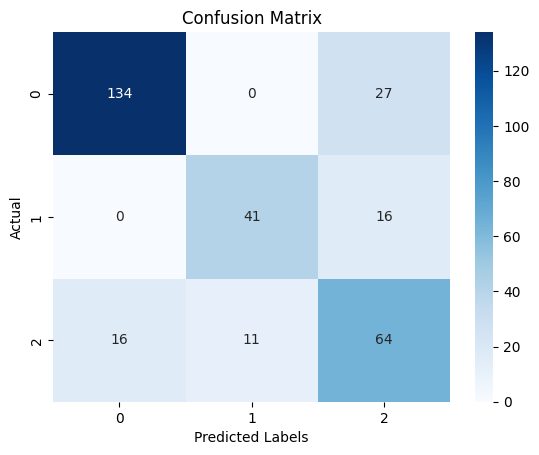

In [29]:
cm = confusion_matrix(y_test,lr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual')
plt.show()

In [30]:
scores = cross_val_score(lr, X, y, cv=5)
scores.mean()

np.float64(0.5165048543689321)

In [31]:
rf.fit(X,y)
accuracy_score(y,rf.predict(X))

1.0